In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Train_Data.csv')

In [3]:
df.columns


Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [4]:
df.head(5)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [5]:
df.isna().sum()/len(df)

ID                     0.000000
Gender                 0.000000
Age                    0.000000
Region_Code            0.000000
Occupation             0.000000
Channel_Code           0.000000
Vintage                0.000000
Credit_Product         0.119341
Avg_Account_Balance    0.000000
Is_Active              0.000000
Is_Lead                0.000000
dtype: float64

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(245725, 11)

In [8]:
df.dropna(inplace=True)

In [9]:
df.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [10]:
df.nunique()

ID                     216400
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    125953
Is_Active                   2
Is_Lead                     2
dtype: int64

In [11]:
df.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,216400.000000,216400.000000,2.164000e+05,216400.000000
mean,42.807315,44.285522,1.115086e+06,0.153942
std,14.850996,31.235351,8.500172e+05,0.360894
min,23.000000,7.000000,2.079000e+04,0.000000
25%,29.000000,20.000000,5.958438e+05,0.000000
50%,41.000000,31.000000,8.805390e+05,0.000000
75%,53.000000,67.000000,1.346543e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [12]:
df.drop('ID',axis=1,inplace=True)

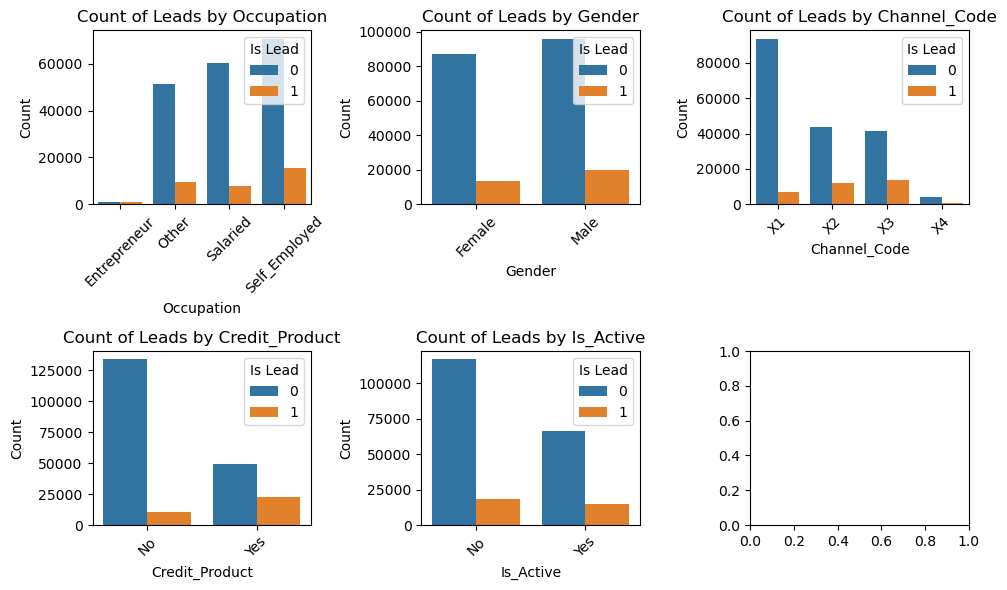

In [13]:
def plot_leads_by_category(data, group_column, target_column, subplot):
    counts = data.groupby([group_column, target_column]).size().reset_index()
    sns.barplot(x=group_column, y=0, data=counts, hue=target_column, ax=subplot)
    subplot.set_xlabel(group_column)
    subplot.set_ylabel('Count')
    subplot.set_title(f'Count of Leads by {group_column}')
    subplot.legend(title='Is Lead')
    subplot.tick_params(axis='x', rotation=45)

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
ax = ax.flatten()
plot_leads_by_category(df, 'Occupation', 'Is_Lead', subplot=ax[0])
plot_leads_by_category(df, 'Gender', 'Is_Lead', subplot=ax[1])
plot_leads_by_category(df, 'Channel_Code', 'Is_Lead', subplot=ax[2])
plot_leads_by_category(df, 'Credit_Product', 'Is_Lead', subplot=ax[3])
plot_leads_by_category(df, 'Is_Active', 'Is_Lead', subplot=ax[4])
plt.tight_layout()
plt.show()


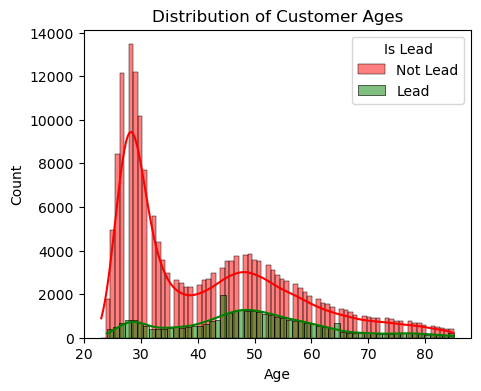

In [14]:
plt.figure(figsize=(5, 4))
sns.histplot(df[df['Is_Lead'] == 0]['Age'], kde=True, color='red', label='Not Lead')
sns.histplot(df[df['Is_Lead'] == 1]['Age'], kde=True, color='green', label='Lead')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Customer Ages')
plt.legend(title='Is Lead')
plt.show()

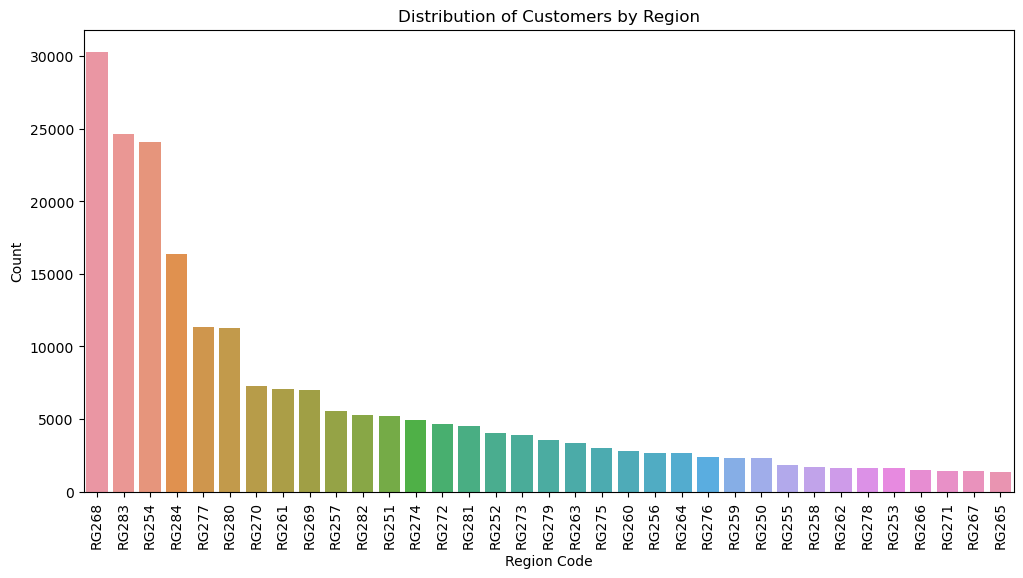

In [15]:
region_counts = df['Region_Code'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=region_counts.index, y=region_counts)
plt.xlabel('Region Code')
plt.ylabel('Count')
plt.title('Distribution of Customers by Region')
plt.xticks(rotation=90)
plt.show()

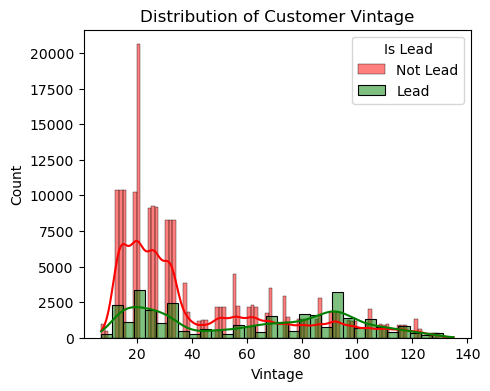

In [16]:
plt.figure(figsize=(5, 4))
sns.histplot(df[df['Is_Lead'] == 0]['Vintage'], kde=True, color='red', label='Not Lead')
sns.histplot(df[df['Is_Lead'] == 1]['Vintage'], kde=True, color='green', label='Lead')
plt.xlabel('Vintage')
plt.ylabel('Count')
plt.title('Distribution of Customer Vintage')
plt.legend(title='Is Lead')
plt.show()

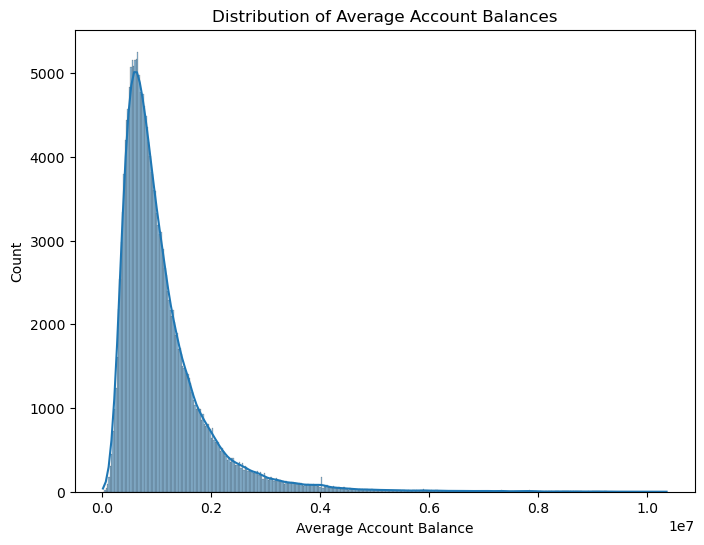

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Avg_Account_Balance'], kde=True)
plt.xlabel('Average Account Balance')
plt.ylabel('Count')
plt.title('Distribution of Average Account Balances')
plt.show()


In [18]:
def outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return outliers


In [19]:
freq_counts = df["Region_Code"].value_counts(normalize=True)

In [20]:
df['Region_Code']=df["Region_Code"].map(freq_counts)

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

standard_scaler = StandardScaler()

df[['Age','Vintage','Avg_Account_Balance']] = standard_scaler.fit_transform(df[['Age','Vintage','Avg_Account_Balance']])


# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

for i in df.select_dtypes("object").columns:
  df[i]=label_encoder.fit_transform(df[i])


In [22]:
X=df.iloc[::,:-1]
y=df.iloc[::,-1]

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

# Random Forest
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# K-Nearest Neighbors (KNN)
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)


Decision Tree Accuracy: 0.7916127541589649
Random Forest Accuracy: 0.8549214417744917
KNN Accuracy: 0.848220887245841


In [25]:
from sklearn.model_selection import GridSearchCV

In [31]:
param_grid = {
    'n_estimators':[5,10,15],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
# Instantiate GridSearchCV
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the data
grid_search.fit(X, y)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Use the best model for prediction
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 15}
Best Score: 0.8609658040665435
